In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


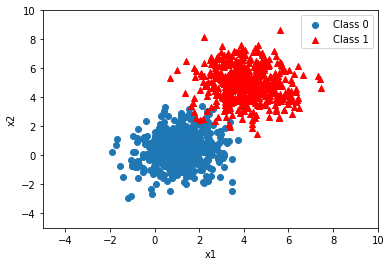

In [3]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [4]:
data = np.zeros((1000,3))
print(data.shape)


(1000, 3)


In [5]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [6]:
np.random.shuffle(data)
print(data[:10])


[[ 0.36267162  0.4615468   0.        ]
 [ 3.62677044  5.73209448  1.        ]
 [ 3.45862349 -2.42917663  0.        ]
 [ 1.37809576 -1.1301177   0.        ]
 [ 1.66333365  0.4536121   0.        ]
 [ 4.70105128  3.43085998  1.        ]
 [-0.33610928  0.09486235  0.        ]
 [ 2.39148564  0.25222512  0.        ]
 [ 1.75755318  3.00360926  1.        ]
 [ 4.54391721  6.45161096  1.        ]]


In [7]:
split = int(0.8*data.shape[0])


In [8]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)


(800, 2) (200, 2)
(800,) (200,)


# Logistic Regression

In [67]:
class LogisticRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.N, self.dim = self.X.shape
        self.coef = np.random.uniform(low=-1, high=1, size=(self.dim))
        self.intercept = np.random.random()
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def hypothesis(self, x):
        return self.sigmoid(self.coef.dot(x) + self.intercept)
    
    def apply_gradient_descent(self, learning_rate=0.1):
        gradients = np.zeros_like(self.coef)
        grad_00 = 0
        
        # Get predictions
        yhat = []
        for x in self.X:
            yhat.append(self.predict(x))
        yhat = np.array(yhat)
        
        # Compute Gradients
        for j in range(self.dim):
            grad = (yhat - self.y) * (self.X[:, j])
            gradients[j] = grad.sum() / self.N
            
        grad_00 = (yhat - self.y).sum() / self.N
            
        # Update Weights
        self.coef = self.coef - (learning_rate * gradients)
        self.intercept = self.intercept - (learning_rate * grad_00)
    
    def compute_loss(self):
        # ylog(hx) + (1-y)log(1-hx)
        error = 0
        for i in range(self.N):
            error += (self.y[i] * np.log2(self.hypothesis(self.X[i]) + 1e-03)) + ((1-self.y[i]) * (np.log2(1 - self.hypothesis(self.X[i]) + 1e-03)))
        error = -error / self.N
        return error
    
    def predict(self, x):
        confidence = self.hypothesis(x)
        if confidence < 0.5:
            return 0
        else:
            return 1
        
    def run(self, losses, iterations=1):
        for _ in range(iterations):
            losses.append(self.compute_loss())
            self.apply_gradient_descent()
        print(losses[:-10])
        return losses

In [15]:
log_reg = LogisticRegression(X_train, Y_train)

In [16]:
losses = [log_reg.compute_loss()]

In [19]:
losses = log_reg.run(losses, 100)

[1.673064104191961, 1.673064104191961, 1.3821051422774722, 1.2893967931575825, 1.228725149946306, 1.185090259147999, 1.1463771098331312, 1.111874901877731, 1.0788422477147646, 1.0475543515091994, 1.0181612333489334, 0.9900905695702517, 0.9638664522116598, 0.943696592114317, 0.920579494008775, 0.9024793345489401, 0.8842653578824705, 0.8680447913990957, 0.8524188679252753, 0.8392201911459809, 0.830435087807257, 0.8233673954685687, 0.8140688217876086, 0.8083184993058896, 0.8010727800855758, 0.7995129041617907, 0.7973499224924493, 0.7924358498827166, 0.7887660831209148, 0.7856513565014441, 0.7831686767373687, 0.781295761848102, 0.7806175601939301, 0.7785051907978032, 0.7765904802502201, 0.7756688027190906, 0.7758513956019342, 0.7753426967511361, 0.7753918505785873, 0.7748494324974716, 0.7743106569726428, 0.7737755242613129, 0.7726992786966731, 0.7708205384838966, 0.7689511227070907, 0.767782769195926, 0.7666182796896155, 0.7654576511725629, 0.7643008805719457, 0.764164473446473, 0.76356739

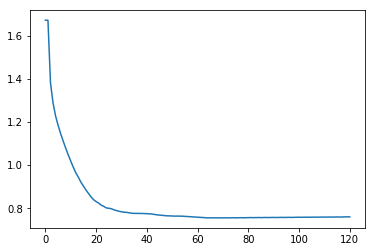

In [20]:
plt.figure()
plt.plot(losses)
plt.show()

In [21]:
predictions = []
for x in X_test:
    predictions.append(log_reg.predict(x))
predictions = np.array(predictions)
predictions.shape

(200,)

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.])

In [28]:
print("Accuracy:", (predictions == Y_test).sum()/Y_test.shape[0])

Accuracy: 0.985


In [30]:
log_reg.coef

array([0.11252758, 0.08872968])

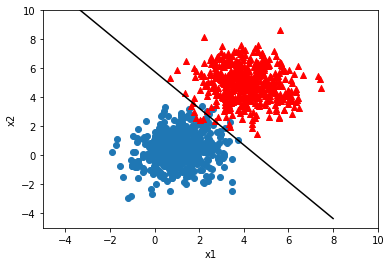

In [34]:
plt.figure()
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
x = np.linspace(-4,8,2)
y = -(log_reg.coef[0]*x + log_reg.intercept)/log_reg.coef[1]
plt.plot(x,y,color='k')
plt.show()

# SKLearn

In [37]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [38]:
ds = load_breast_cancer()
sk_logreg = SKLogisticRegression()

In [39]:
X_tr, X_ts, y_tr, y_ts = train_test_split(ds.data, ds.target, test_size=0.2)

In [41]:
sk_logreg.fit(X_tr, y_tr)

/Users/Pratulya/Desktop/codingblocks/ml-dwarka/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
(sk_logreg.predict(X_ts) == y_ts).sum() / y_ts.shape[0]

0.9649122807017544

In [68]:
X_tr = (X_tr - X_tr.mean(axis=0)) / X_tr.std(axis=0)
X_ts = (X_ts - X_ts.mean(axis=0)) / X_ts.std(axis=0)
lr = LogisticRegression(X_tr, y_tr)
losses = [log_reg.compute_loss()]

In [72]:
losses = lr.run(losses, 50)

[0.7596157311244142, 2.1423511322160715, 1.6477383886030044, 1.3083145884397527, 1.1037433758588524, 0.9556171533798372, 0.8473199802960567, 0.7698142812941976, 0.7163060555278231, 0.672839913965198, 0.6367863569054253, 0.6055663332889449, 0.5778419712457626, 0.5540395307954462, 0.5326661125121285, 0.5130307725924598, 0.49642437827217345, 0.482222232413796, 0.46852546400093265, 0.45571539164138664, 0.44544639470551295, 0.4361046914641251, 0.42729418756202775, 0.41889535158465796, 0.4107168123791168, 0.40326395323535863, 0.39599716794380546, 0.38981947122362753, 0.3837802702694102, 0.37856531175712965, 0.37345805928586856, 0.36870885406092824, 0.3641469566129051, 0.3596741347303273, 0.3561751844456523, 0.35292529433564784, 0.349960033432021, 0.34699000484686826, 0.34406320865785756, 0.34125830904121973, 0.33849385237644547, 0.33594322653855974, 0.33342805229378375, 0.33105825201038325, 0.32880466658512864, 0.32673182821974406, 0.3245348418116971, 0.32251665195896145, 0.3205253583546473,

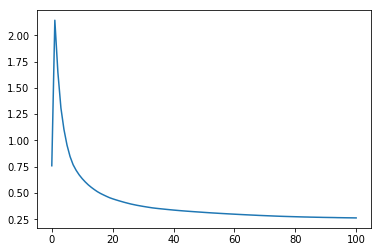

In [73]:
plt.figure()
plt.plot(losses)
plt.show()

In [74]:
predictions = []
for x in X_ts:
    predictions.append(lr.predict(x))
predictions = np.array(predictions)
print("Accuracy:", (predictions == y_ts).sum()/y_ts.shape[0])

Accuracy: 0.9736842105263158
